In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final_rank_load = "final_rank_by_zip.csv"
final_rank = pd.read_csv(final_rank_load)

In [3]:
crime_load = "2016 Austin crime data - clean.csv"
crime_df = pd.read_csv(crime_load)

In [4]:
crime_clean_df = crime_df[['Highest Offense Description', 'Zip Code']]

In [5]:
total_crime_count = crime_clean_df.groupby('Zip Code').count()
new_name= total_crime_count.rename(columns={"Highest Offense Description": "Crime Count"})

In [6]:
blended_rank_and_crime = pd.merge(final_rank, new_name, how="left", on=["Zip Code", "Zip Code"])
sorted_df= blended_rank_and_crime.sort_values(by='Total Score', ascending=True)
final_df = sorted_df.reset_index(drop = True)
per_capita = final_df['Crime Count']/final_df['Total Population (18+)']
per_capita_df = pd.concat([final_df, per_capita],axis=1)
df = per_capita_df.rename(columns={0: "Crime per Capita"})
df

,Zip Code,Total Score,Total Population (18+),Crime Count,Crime per Capita
0,78721,3.0625,9363,2102,0.224501
1,78741,3.5000,42237,9725,0.230248
2,78705,3.7500,31595,2521,0.079791
3,78744,4.6250,32628,6403,0.196242
4,78752,5.4375,14975,3536,0.236127
5,78742,6.5000,613,168,0.274062
6,78702,6.7500,18003,5334,0.296284
7,78753,7.5000,40862,8678,0.212373
8,78723,7.6250,24442,6020,0.246297
9,78758,9.8750,36167,7892,0.218210


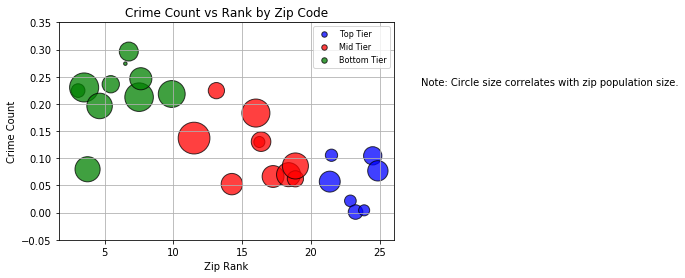

In [19]:
top_third = df.loc[df['Total Score'] > 20]
x_top = top_third['Total Score']
y_top = top_third['Crime per Capita']
s_top = top_third["Total Population (18+)"]
middle_third = df.loc[(df['Total Score'] <= 20)&(df['Total Score'] > 10)]
x_mid = middle_third['Total Score']
y_mid = middle_third['Crime per Capita']
s_mid = middle_third["Total Population (18+)"]
bottom_third = df.loc[final_df['Total Score'] <= 10]
x_bottom = bottom_third['Total Score']
y_bottom = bottom_third['Crime per Capita']
s_bottom = bottom_third["Total Population (18+)"]
top = plt.scatter(x_top, y_top, marker="o", facecolors='blue', s=s_top*.02, edgecolors="black",alpha= .75, label="Top Tier", linewidths = 1)
mid = plt.scatter(x_mid, y_mid, marker="o", facecolors="red", s=s_mid*.02, edgecolors="black",alpha=.75, label="Mid Tier", linewidths = 1)
bottom = plt.scatter(x_bottom, y_bottom, marker="o", facecolors="green", s=s_bottom*.02, edgecolors="black",alpha=.75, label = "Bottom Tier", linewidths = 1)
plt.title("Crime Count vs Rank by Zip Code")
plt.xlabel("Zip Rank")
plt.ylabel("Crime Count")
plt.grid()
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=8)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.text(28, .25, "Note: Circle size correlates with zip population size.", fontsize=10,
         va='top',wrap = True)
plt.ylim(-.05, .35)
plt.savefig("Images/Crime_per_capita_by_Zip.png", bbox_inches='tight')
plt.show()